In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor

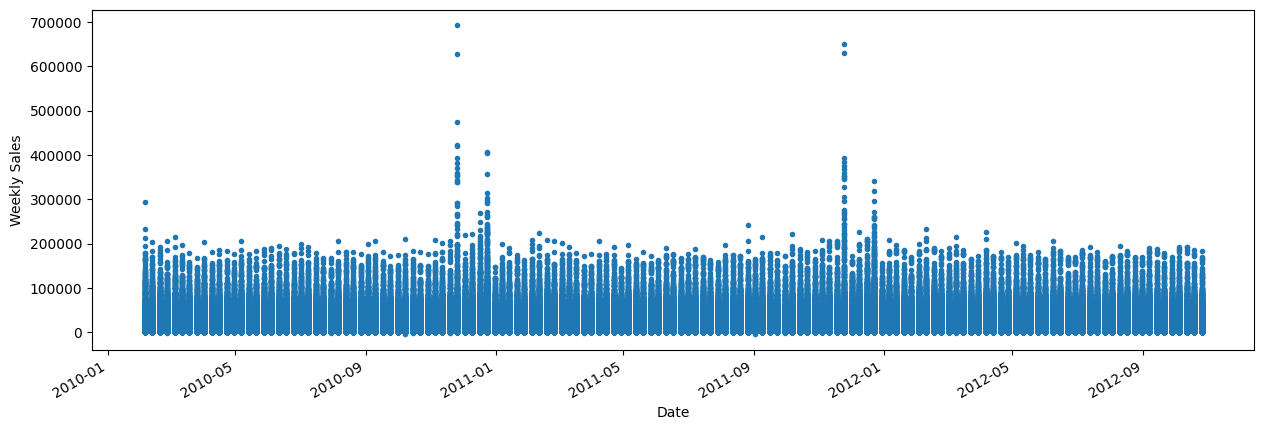

In [100]:
df = pd.read_csv('Data/train.csv')
df['IsHoliday'] = df['IsHoliday'].astype(int)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Weekly_Sales'].plot(style='.', figsize=(15,5), xlabel='Date', ylabel='Weekly Sales')
plt.show()


In [101]:
df

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,0
2010-02-12,1,1,46039.49,1
2010-02-19,1,1,41595.55,0
2010-02-26,1,1,19403.54,0
2010-03-05,1,1,21827.90,0
...,...,...,...,...
2012-09-28,45,98,508.37,0
2012-10-05,45,98,628.10,0
2012-10-12,45,98,1061.02,0


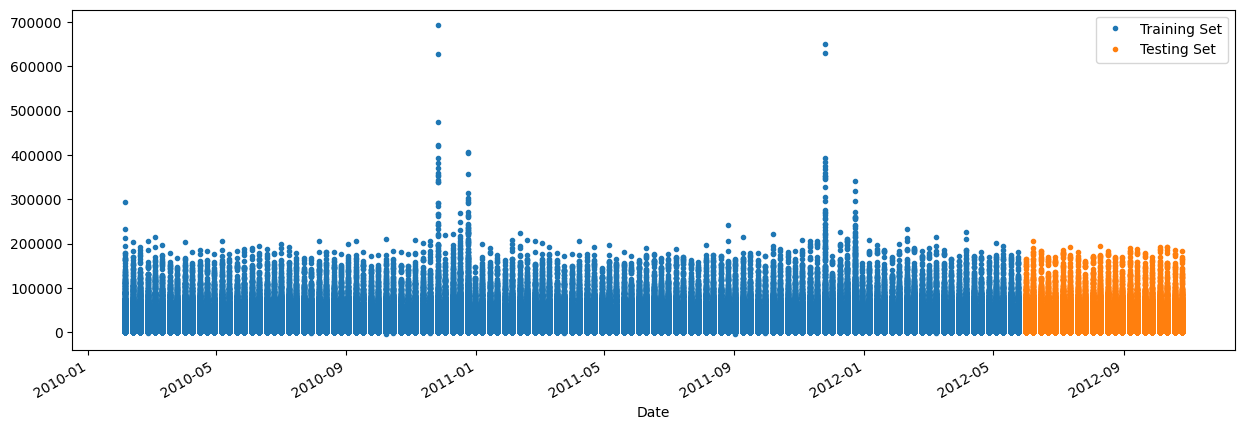

In [102]:
df = df.sort_index()
train = df.loc[df.index < '2012-05-31'].copy()
test = df.loc[df.index >= '2012-05-31'].copy()

fig, ax = plt.subplots(figsize=(15,5))
train['Weekly_Sales'].plot(style='.', ax=ax, label='Training Set')
test['Weekly_Sales'].plot(style='.', ax=ax, label='Testing Set')
plt.legend()
plt.show()



In [103]:
def create_features(df):
    df['dayofweek'] = df.index.dayofweek
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    return df

train = create_features(train)
test = create_features(test)


In [104]:
features = ['Store', 'Dept', 'IsHoliday', 'dayofweek', 'year','month', 'quarter', 'dayofyear']

X_train = train[features]
y_train = train['Weekly_Sales']
X_test = test[features]
y_test = test['Weekly_Sales']

In [107]:
model = XGBRegressor()
model.fit(X_train, y_train)

In [112]:
y_pred = model.predict(X_test)


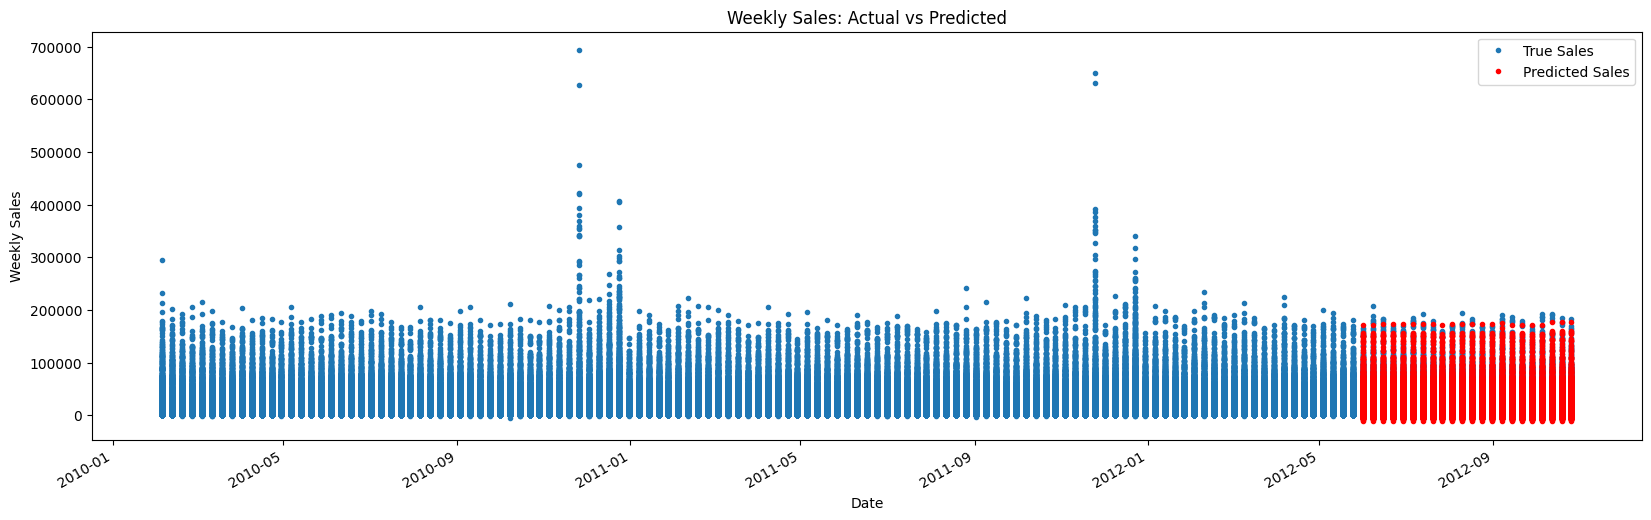

In [117]:
test = test.copy()
test['prediction'] = y_pred


fig, ax = plt.subplots(figsize=(20,6))
df['Weekly_Sales'].plot(style='.', ax=ax, label='True Sales')
test['prediction'].plot(style='.', color='red', ax=ax, label='Predicted Sales')
plt.legend()
ax.set_title('Weekly Sales: Actual vs Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Weekly Sales')
plt.show()


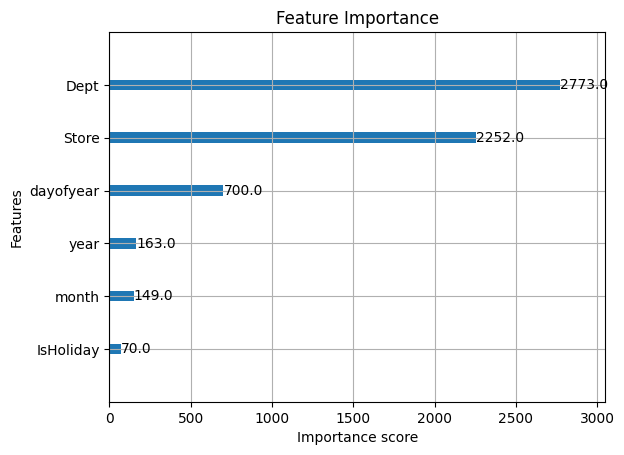

In [121]:
from xgboost import plot_importance

plot_importance(model, importance_type='weight')
plt.title('Feature Importance')
plt.show()